# dTale

In [1]:
import dtale
import pandas as pd

df = pd.read_csv('../../data/prep_survey_profile.csv')

# launch dtale in browser
d = dtale.show(df, port=4000)
print(d._main_url)

http://S340-PAD:4000/dtale/main/1


In [4]:
# end dtale session
d.kill()

2024-12-22 11:01:50,040 - INFO     - Executing shutdown...
2024-12-22 11:01:50,044 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


# Univariate Analysis, Bivariate Analysis, Multivariate Analysis

In [ ]:
# What is your age (# years)? -->'25-29','30-34','22-24','35-39','40-44','45-49','50-54','18-21','55-59','60-69','70+'
# What is your gender? -->'Male','Female'
# In which country do you currently reside? --> (List of countries)
# What is the highest level of formal education that you have attained or plan to attain within the next 2 years? -->'Master's Degree','Bachelor's Degree','Doctoral Degree','Professional Degree','Some college university study without earning a bachelor's degree','I prefer not to answer','No formal education past high school'
# Select the title most similar to your current role (or most recent title if retired) -->'Data Scientist','Software Engineer','Research Scientist','Data Analyst','Other','Product/Project Manager','Data Engineer','Business Analyst','Statistician','DBA/Database Engineer'
# What is the size of the company where you are employed? -->'Small','Enterprise','Large','Medium','Mid-Large'
# Approximately how many individuals are responsible for data science workloads at your place of business? -->'20+','1-2','3-4','5-9','0','10-14','15-19'
# Does your current employer incorporate machine learning methods into their business? -->'I do not know','No (we do not use ML methods)','We are exploring ML methods (and may one day put a model into production)','We recently started using ML methods (i.e., models in production for less than 2 years)','We use ML methods for generating insights (but do not put working models into production)','We have well established ML methods (i.e., models in production for more than 2 years)'
# What is your current yearly compensation (approximate $USD)? --> '$0-999','$100,000-124,999','40,000-49,999','125,000-149,999','10,000-14,999','30,000-39,999','50,000-59,999','20,000-24,999','150,000-199,999','60,000-69,999','70,000-79,999','90,000-99,999','25,000-29,999','15,000-19,999','80,000-89,999','5,000-7,499','1,000-1,9999','4,000-4,999','7,500-7,999','200,000-249,999','2,000-2,999','3,000-3,999','250,000-299,999','300,000-500,000','> $500,000'
# Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years? -->'$0 (USD)','$100-$999','$1000-$9,999','$1-$999','$10,000-$99,999','>$100,000 ($USD)'
# What is the primary tool that you use at work or school to analyze data? -->'Local development environments','Basic statistical software','Cloud-based data software & APIs','Other','Business intelligence software','Advanced statistical software'
# How long have you been writing code to analyze data (at work or at school)? -->'3-5 years','1-2 years','5-10 years','< 1 years','10-20 years','20+ years'
# What programming language would you recommend an aspiring data scientist to learn first? -->'Python','R','SQL','Other'
# Have you ever used a TPU (tensor processing unit)? -->'Never','Used TPU'
# For how many years have you used machine learning methods? -->'1-2 years','< 1 years','2-3 years','3-4 years','4-5 years','5-10 years','10-15 years','20+ years'

### Continuous Variables

| Column Name       | Description                                                                         |
|-------------------|-------------------------------------------------------------------------------------|
| **Age**           | What is your age (# years)?                                                         |
| **Salary**        | What is your current yearly compensation (approximate $USD)?                        |
| **ML_Cloud_Spend**| Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years? |
| **Coding_Years**  | How long have you been writing code to analyze data (at work or at school)?         |
| **ML_Years**      | For how many years have you used machine learning methods?                          |

### Categorical Variables

| Column Name     | Description                                                                       |
|-----------------|-----------------------------------------------------------------------------------|
| **Gender**      | What is your gender?                                                              |
| **Country**     | In which country do you currently reside?                                         |
| **Education**   | What is the highest level of formal education that you have attained or plan to attain within the next 2 years? |
| **Job_Title**   | Select the title most similar to your current role (or most recent title if retired) |
| **Company_Size**| What is the size of the company where you are employed?                           |
| **DS_Workload** | Approximately how many individuals are responsible for data science workloads at your place of business? |
| **ML_Use**      | Does your current employer incorporate machine learning methods into their business? |
| **Primary_Tool**| What is the primary tool that you use at work or school to analyze data?          |
| **First_Lang**  | What programming language would you recommend an aspiring data scientist to learn first? |
| **TPU_Use**     | Have you ever used a TPU (tensor processing unit)?                                 |

## Univariate Analysis for All Variables

In [101]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Enable offline mode for Plotly in Jupyter
init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)

# Remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # Update columns to strings in case they are numbers

s = df[~pd.isnull(df['What is your current yearly compensation (approximate $USD)?'])]['What is your current yearly compensation (approximate $USD)?']
chart = pd.value_counts(s).to_frame(name='data')
chart['percent'] = (chart['data'] / chart['data'].sum()) * 100
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]

# Create the bar chart with percentage text on top of bars
charts = [go.Bar(
    x=chart['labels'].values, 
    y=chart['data'].values, 
    name='Frequency',
    text=chart['percent'].apply(lambda x: f'{x:.2f}%').values,  # Add percentage text on top of the bars
    textposition='outside'  # Position the text outside the bars
)]

figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Yearly Compensation Distribution'},
    'xaxis': {'title': {'text': 'What is your current yearly compensation (approximate $USD)?'}},
    'yaxis': {'title': {'text': 'Frequency'}}
}))

iplot(figure)

In [54]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Enable offline mode for Plotly in Jupyter
init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['What is your age (# years)?'],
], axis=1)
chart_data = chart_data.sort_values(['What is your age (# years)?'])
chart_data = chart_data.rename(columns={'What is your age (# years)?': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['__index__||count'] > 0]  # can't represent negatives in a pie

chart = go.Pie(labels=chart_data['x'], values=chart_data['__index__||count'])
figure = go.Figure(data=[chart], layout=go.Layout({
    'showlegend': True, 'title': {'text': 'Age Distribution'}
}))

iplot(figure)

In [69]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Enable offline mode for Plotly in Jupyter
init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['What is your gender?'],
], axis=1)
chart_data = chart_data.sort_values(['What is your gender?'])
chart_data = chart_data.rename(columns={'What is your gender?': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['__index__||count'] > 0]  # can't represent negatives in a pie

chart = go.Pie(labels=chart_data['x'], values=chart_data['__index__||count'])
figure = go.Figure(data=[chart], layout=go.Layout({
    'legend': {'orientation': 'h', 'y': 0.5}, 'title': {'text': 'Gender Distribution'}
}))

iplot(figure)

In [61]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['In which country do you currently reside?'],
], axis=1)
chart_data = chart_data.sort_values(['In which country do you currently reside?'])
chart_data = chart_data.rename(columns={'In which country do you currently reside?': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()



charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['__index__||count']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h', 'y': -0.3},
    'title': {'text': 'Country Distribution'},
    'xaxis': {'title': {'text': 'Country'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count'}, 'type': 'linear'}
}))

iplot(figure)

In [74]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'],
], axis=1)
chart_data = chart_data.sort_values(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'])
chart_data = chart_data.rename(columns={'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['__index__||count'] > 0]  # can't represent negatives in a pie

chart = go.Pie(labels=chart_data['x'], values=chart_data['__index__||count'])
figure = go.Figure(data=[chart], layout=go.Layout({
    'showlegend': True,
    'title': {'text': ('Education Distribution')}
}))

iplot(figure)

In [78]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['Select the title most similar to your current role (or most recent title if retired)'],
], axis=1)
chart_data = chart_data.sort_values(['Select the title most similar to your current role (or most recent title if retired)'])
chart_data = chart_data.rename(columns={'Select the title most similar to your current role (or most recent title if retired)': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['__index__||count'] > 0]  # can't represent negatives in a pie


chart = go.Pie(labels=chart_data['x'], values=chart_data['__index__||count'])
figure = go.Figure(data=[chart], layout=go.Layout({
    'showlegend': True,
    'title': {'text': ('Job Title Distribution')}
}))

iplot(figure)

In [80]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['What is the size of the company where you are employed?'],
], axis=1)
chart_data = chart_data.sort_values(['What is the size of the company where you are employed?'])
chart_data = chart_data.rename(columns={'What is the size of the company where you are employed?': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['__index__||count'] > 0]  # can't represent negatives in a pie


chart = go.Pie(labels=chart_data['x'], values=chart_data['__index__||count'])
figure = go.Figure(data=[chart], layout=go.Layout({
    'legend': {'orientation': 'h', 'y': -0.3},
    'title': {'text': 'Company Size Distribution'}
}))

iplot(figure)

In [83]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['Approximately how many individuals are responsible for data science workloads at your place of business?'],
], axis=1)
chart_data = chart_data.sort_values(['Approximately how many individuals are responsible for data science workloads at your place of business?'])
chart_data = chart_data.rename(columns={'Approximately how many individuals are responsible for data science workloads at your place of business?': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['__index__||count'] > 0]  # can't represent negatives in a pie

chart = go.Pie(labels=chart_data['x'], values=chart_data['__index__||count'])
figure = go.Figure(data=[chart], layout=go.Layout({
    'showlegend': True,
    'title': {'text': ('Individual Responsible for Data Science Workload at Workplace Distribution')}
}))

iplot(figure)

In [85]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['Does your current employer incorporate machine learning methods into their business?'],
], axis=1)
chart_data = chart_data.sort_values(['Does your current employer incorporate machine learning methods into their business?'])
chart_data = chart_data.rename(columns={'Does your current employer incorporate machine learning methods into their business?': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['__index__||count'] > 0]  # can't represent negatives in a pie

import plotly.graph_objs as go

chart = go.Pie(labels=chart_data['x'], values=chart_data['__index__||count'])
figure = go.Figure(data=[chart], layout=go.Layout({
    'showlegend': True,
    'title': {'text': ('Machine Learning Usage in Workplace Distribution')}
}))

iplot(figure)

In [87]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?'],
], axis=1)
chart_data = chart_data.sort_values(['Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?'])
chart_data = chart_data.rename(columns={'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['__index__||count'] > 0]  # can't represent negatives in a pie

import plotly.graph_objs as go

chart = go.Pie(labels=chart_data['x'], values=chart_data['__index__||count'])
figure = go.Figure(data=[chart], layout=go.Layout({
    'showlegend': True,
    'title': {'text': ('Machine Learning/Cloud Computing Products Spent Distribution')}
}))

iplot(figure)

In [89]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['What is the primary tool that you use at work or school to analyze data?'],
], axis=1)
chart_data = chart_data.sort_values(['What is the primary tool that you use at work or school to analyze data?'])
chart_data = chart_data.rename(columns={'What is the primary tool that you use at work or school to analyze data?': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['__index__||count'] > 0]  # can't represent negatives in a pie

chart = go.Pie(labels=chart_data['x'], values=chart_data['__index__||count'])
figure = go.Figure(data=[chart], layout=go.Layout({
    'showlegend': True,
    'title': {'text': 'Data Analysis Tools Distribution'}
}))

iplot(figure)

In [92]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['How long have you been writing code to analyze data (at work or at school)?'],
], axis=1)
chart_data = chart_data.sort_values(['How long have you been writing code to analyze data (at work or at school)?'])
chart_data = chart_data.rename(columns={'How long have you been writing code to analyze data (at work or at school)?': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['__index__||count'] > 0]  # can't represent negatives in a pie


chart = go.Pie(labels=chart_data['x'], values=chart_data['__index__||count'])
figure = go.Figure(data=[chart], layout=go.Layout({
    'showlegend': True,
    'title': {'text': 'Coding Experience Distribution'}
}))

iplot(figure)

In [103]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['What programming language would you recommend an aspiring data scientist to learn first?'],
], axis=1)
chart_data = chart_data.sort_values(['What programming language would you recommend an aspiring data scientist to learn first?'])
chart_data = chart_data.rename(columns={'What programming language would you recommend an aspiring data scientist to learn first?': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['__index__||count'] > 0]  # can't represent negatives in a pie


chart = go.Pie(labels=chart_data['x'], values=chart_data['__index__||count'])
figure = go.Figure(data=[chart], layout=go.Layout({
    'legend': {'orientation': 'h', 'y': -0.3},
    'title': {'text': ('First Language Recommendation to Learn For Data Scientist Distribution')}
}))

iplot(figure)

In [98]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['Have you ever used a TPU (tensor processing unit)?'],
], axis=1)
chart_data = chart_data.sort_values(['Have you ever used a TPU (tensor processing unit)?'])
chart_data = chart_data.rename(columns={'Have you ever used a TPU (tensor processing unit)?': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['__index__||count'] > 0]  # can't represent negatives in a pie

import plotly.graph_objs as go

chart = go.Pie(labels=chart_data['x'], values=chart_data['__index__||count'])
figure = go.Figure(data=[chart], layout=go.Layout({
    'legend': {'orientation': 'h', 'y': -0.3},
    'title': {'text': 'TPU (Tensor Processing Unit) Usage Experience Distribution'}
}))

iplot(figure)

In [100]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.index, index=df.index, name='__index__'),
	df['For how many years have you used machine learning methods?'],
], axis=1)
chart_data = chart_data.sort_values(['For how many years have you used machine learning methods?'])
chart_data = chart_data.rename(columns={'For how many years have you used machine learning methods?': 'x'})
chart_data_count = chart_data.groupby(['x'], dropna=True)[['__index__']].count()
chart_data_count.columns = ['__index__||count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['__index__||count'] > 0]  # can't represent negatives in a pie


chart = go.Pie(labels=chart_data['x'], values=chart_data['__index__||count'])
figure = go.Figure(data=[chart], layout=go.Layout({
    'showlegend': True,
    'title': {'text': 'Machine Learning Usage Experience Distribution'}
}))

iplot(figure)

## Bivariate Analysis

The combination for bivariate analysis can be Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

### Continous vs Continuous (Age vs Yearly Salary Compensation)

In [2]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Enable offline mode for Plotly in Jupyter
init_notebook_mode(connected=True)

# Your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)

# Remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
# Update columns to strings in case they are numbers
df.columns = [str(c) for c in df.columns]

# Convert salary ranges to numeric midpoints
def convert_salary_range(salary_str):
    try:
        # Remove unwanted characters and split the range
        salary_str = salary_str.replace('$', '').replace('>', '').replace(',', '')
        if '-' in salary_str:
            low, high = salary_str.split('-')
            return (float(low) + float(high)) / 2
        else:
            return float(salary_str)
    except ValueError:
        return None

df['Salary_Numeric'] = df['What is your current yearly compensation (approximate $USD)?'].apply(convert_salary_range)

# Calculate median salary for each age group and gender
median_salary = df.groupby(['What is your age (# years)?', 'What is your gender?'])['Salary_Numeric'].median().reset_index()

# Create scatter plots for each gender
scatter_female = go.Scatter(
    x=median_salary[median_salary['What is your gender?'] == 'Female']['What is your age (# years)?'],
    y=median_salary[median_salary['What is your gender?'] == 'Female']['Salary_Numeric'],
    mode='markers+lines',
    opacity=0.7,
    name='Female',
    marker={'size': 10, 'line': {'width': 0.5, 'color': 'white'}}
)

scatter_male = go.Scatter(
    x=median_salary[median_salary['What is your gender?'] == 'Male']['What is your age (# years)?'],
    y=median_salary[median_salary['What is your gender?'] == 'Male']['Salary_Numeric'],
    mode='markers+lines',
    opacity=0.7,
    name='Male',
    marker={'size': 10, 'line': {'width': 0.5, 'color': 'white'}}
)

figure = go.Figure(data=[scatter_female, scatter_male], layout=go.Layout({
    'showlegend': True,
    'legend': {'orientation': 'h', 'y': -0.3},
    'title': {'text': 'Median of Yearly Salary Compensation by Age Grouped by Gender'},
    'xaxis': {'title': {'text': 'Age'}},
    'yaxis': {'title': {'text': 'Median of Yearly Salary Compensation'}, 'type': 'linear'}
}))

iplot(figure)

### Categorical vs Categorical (Education vs Gender)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

# Contingency Table
contingency_table = pd.crosstab(df['What is your gender?'], df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'])
print(contingency_table)

What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  Bachelor’s degree  \
What is your gender?                                                                                                                 
Female                                                                                                                         212   
Male                                                                                                                          1791   

What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  Doctoral degree  \
What is your gender?                                                                                                               
Female                                                                                                                       225   
Male                                                               

Contingency Table Result:

| Gender | Bachelor’s Degree | Doctoral Degree | I Prefer Not to Answer | Master’s Degree | No Formal Education Past High School | Professional Degree | Some College/University Study Without Earning a Bachelor’s Degree |
|--------|--------------------|-----------------|------------------------|-----------------|--------------------------------------|---------------------|-----------------------------------------------------------------|
| Female | 212                | 225             | 9                      | 525             | 8                                    | 28                  | 13                                                              |
| Male   | 1791               | 1187            | 75                     | 3225            | 56                                   | 235                 | 210                                                             |


In [9]:
# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test: chi2={chi2}, p-value={p}')

Chi-Square Test: chi2=36.00553161950247, p-value=2.749810752633144e-06


p-value is extremely low (less than 0.5) indicating the observed distribution levels across genders is significant. There is a significant association between gender and education level, and the differences in the table are unlikely to have occurred by chance.

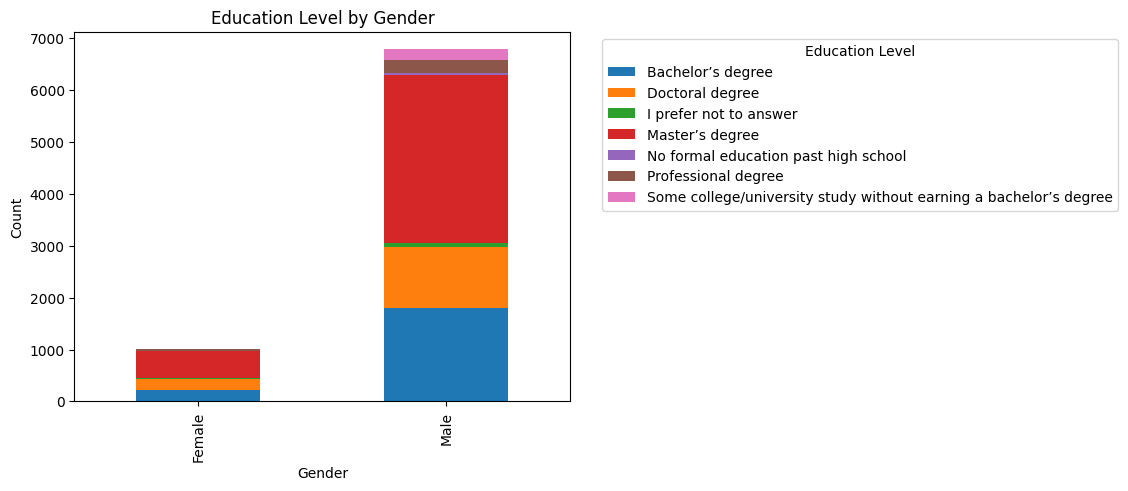

In [10]:
# Stacked Bar Chart for Visualization
contingency_table.plot(kind='bar', stacked=True)
plt.title('Education Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()
plt.show()

### Categorical vs Categorical (Job Title vs Company Size)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

# Contingency Table
contingency_table = pd.crosstab(df['Select the title most similar to your current role (or most recent title if retired)'], df['What is the size of the company where you are employed?'])
print(contingency_table)

What is the size of the company where you are employed?  Enterprise  Large  \
Select the title most similar to your current r...                           
Business Analyst                                                 91     70   
DBA/Database Engineer                                            19     18   
Data Analyst                                                    181    175   
Data Engineer                                                    77     72   
Data Scientist                                                  675    559   
Other                                                           180    139   
Product/Project Manager                                         104     56   
Research Scientist                                              129    186   
Software Engineer                                               318    208   
Statistician                                                     23     32   

What is the size of the company where you are employed?  Medium

Contingency Table Result:

| Job Title                 | Enterprise | Large | Medium | Mid-Large | Small |
|---------------------------|------------|-------|--------|-----------|-------|
| Business Analyst          | 91         | 70    | 44     | 37        | 85    |
| DBA/Database Engineer     | 19         | 18    | 10     | 9         | 15    |
| Data Analyst              | 181        | 175   | 140    | 111       | 201   |
| Data Engineer             | 77         | 72    | 51     | 42        | 91    |
| Data Scientist            | 675        | 559   | 466    | 341       | 833   |
| Other                     | 180        | 139   | 136    | 102       | 212   |
| Product/Project Manager   | 104        | 56    | 67     | 37        | 86    |
| Research Scientist        | 129        | 186   | 133    | 128       | 253   |
| Software Engineer         | 318        | 208   | 209    | 165       | 410   |
| Statistician              | 23         | 32    | 15     | 18        | 40    |


In [13]:
# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test: chi2={chi2}, p-value={p}')

Chi-Square Test: chi2=85.10941991875065, p-value=7.434516026001371e-06


Given that the p-value is much smaller than 0.05, we can conclude that the association between job title and company size is statistically significant. This means that the distribution of job titles across different company sizes is not random and there is a meaningful relationship between these two variables.

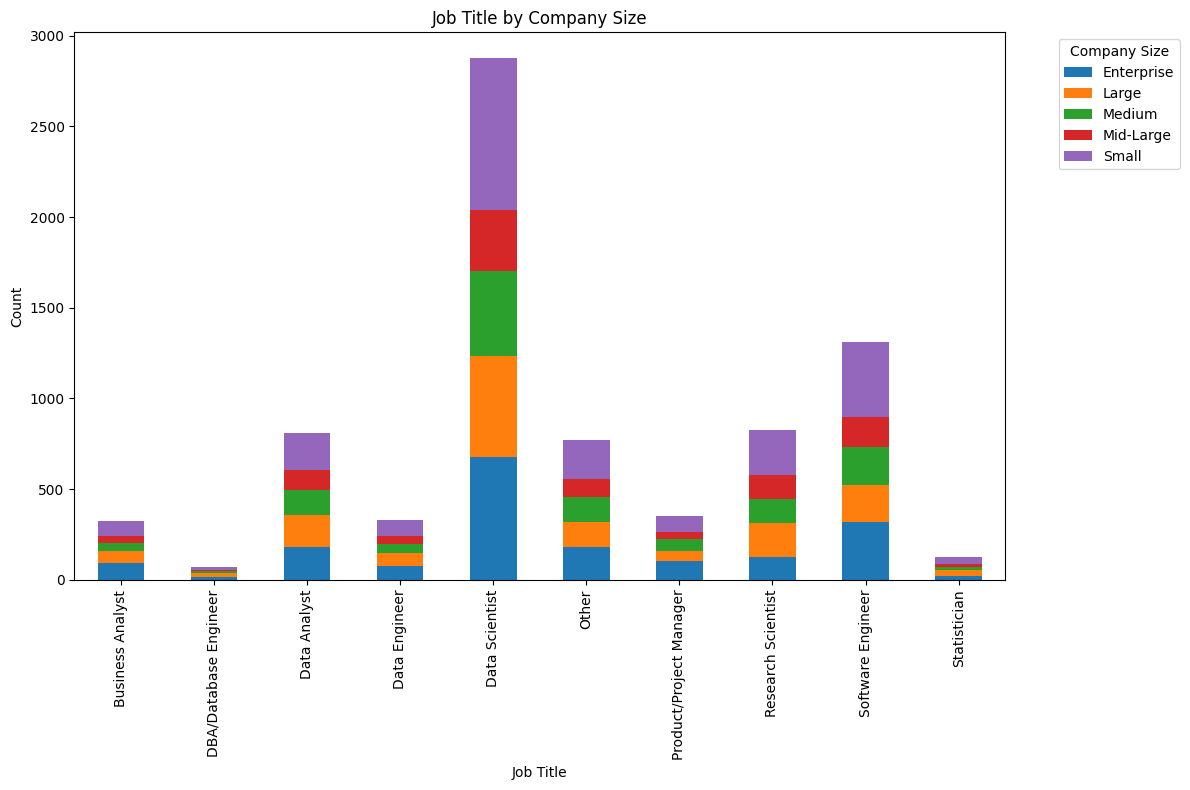

In [14]:
# Stacked Bar Chart for Visualization
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Job Title by Company Size')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Certain job titles are more or less prevalent in companies of different sizes. For example, we might find more Data Scientists in larger enterprises compared to smaller companies.

### Categorical vs Categorical (Gender vs Job Title)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

# Contingency Table
contingency_table = pd.crosstab(df['What is your gender?'], df['Select the title most similar to your current role (or most recent title if retired)'])
print(contingency_table)


Select the title most similar to your current role (or most recent title if retired)  Business Analyst  \
What is your gender?                                                                                     
Female                                                                                              34   
Male                                                                                               293   

Select the title most similar to your current role (or most recent title if retired)  DBA/Database Engineer  \
What is your gender?                                                                                          
Female                                                                                                    7   
Male                                                                                                     64   

Select the title most similar to your current role (or most recent title if retired)  Data Analyst  \
What is your gender?        

Contingency Table Result:

| Job Title                       | Female | Male |
|---------------------------------|--------|------|
| Business Analyst                | 34     | 293  |
| DBA/Database Engineer           | 7      | 64   |
| Data Analyst                    | 155    | 653  |
| Data Engineer                   | 35     | 298  |
| Data Scientist                  | 408    | 2466 |
| Other                           | 93     | 676  |
| Product/Project Manager         | 28     | 322  |
| Research Scientist              | 126    | 703  |
| Software Engineer               | 119    | 1191 |
| Statistician                    | 15     | 113  |


In [16]:
# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test: chi2={chi2}, p-value={p}')

Chi-Square Test: chi2=64.76404598308903, p-value=1.6035022058037741e-10


A high chi-square value suggests a greater deviation between the observed and expected frequencies indicating a potential association between the variables. Given that the p-value is significantly smaller than 0.05, we can conclude that the association between job title and gender is statistically significant. This means that the distribution of job titles across genders is not random and there is a meaningful relationship between these two variables.

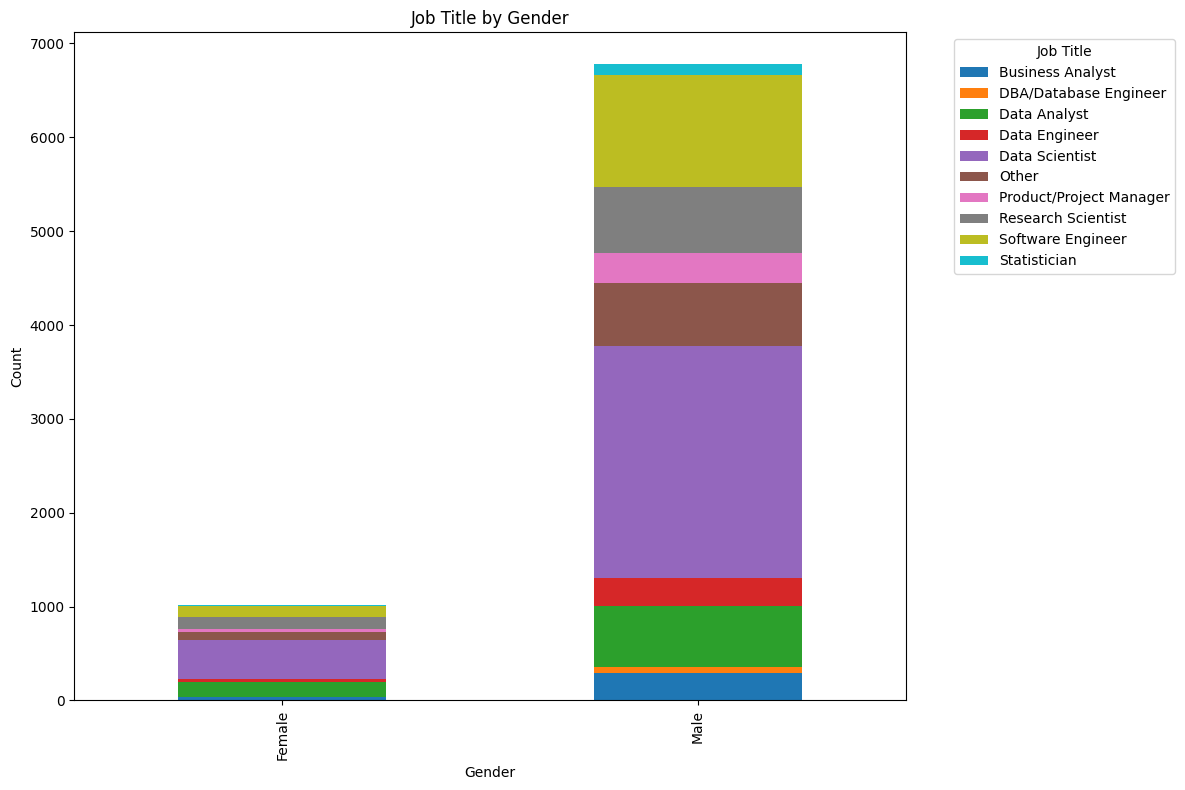

In [17]:
# Stacked Bar Chart for Visualization
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Job Title by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Certain job titles are more or less prevalent among different genders. For example, roles like Data Scientist and Software Engineer have a higher representation of males compared to females.

### Categorical vs Categorical (Country vs Education)

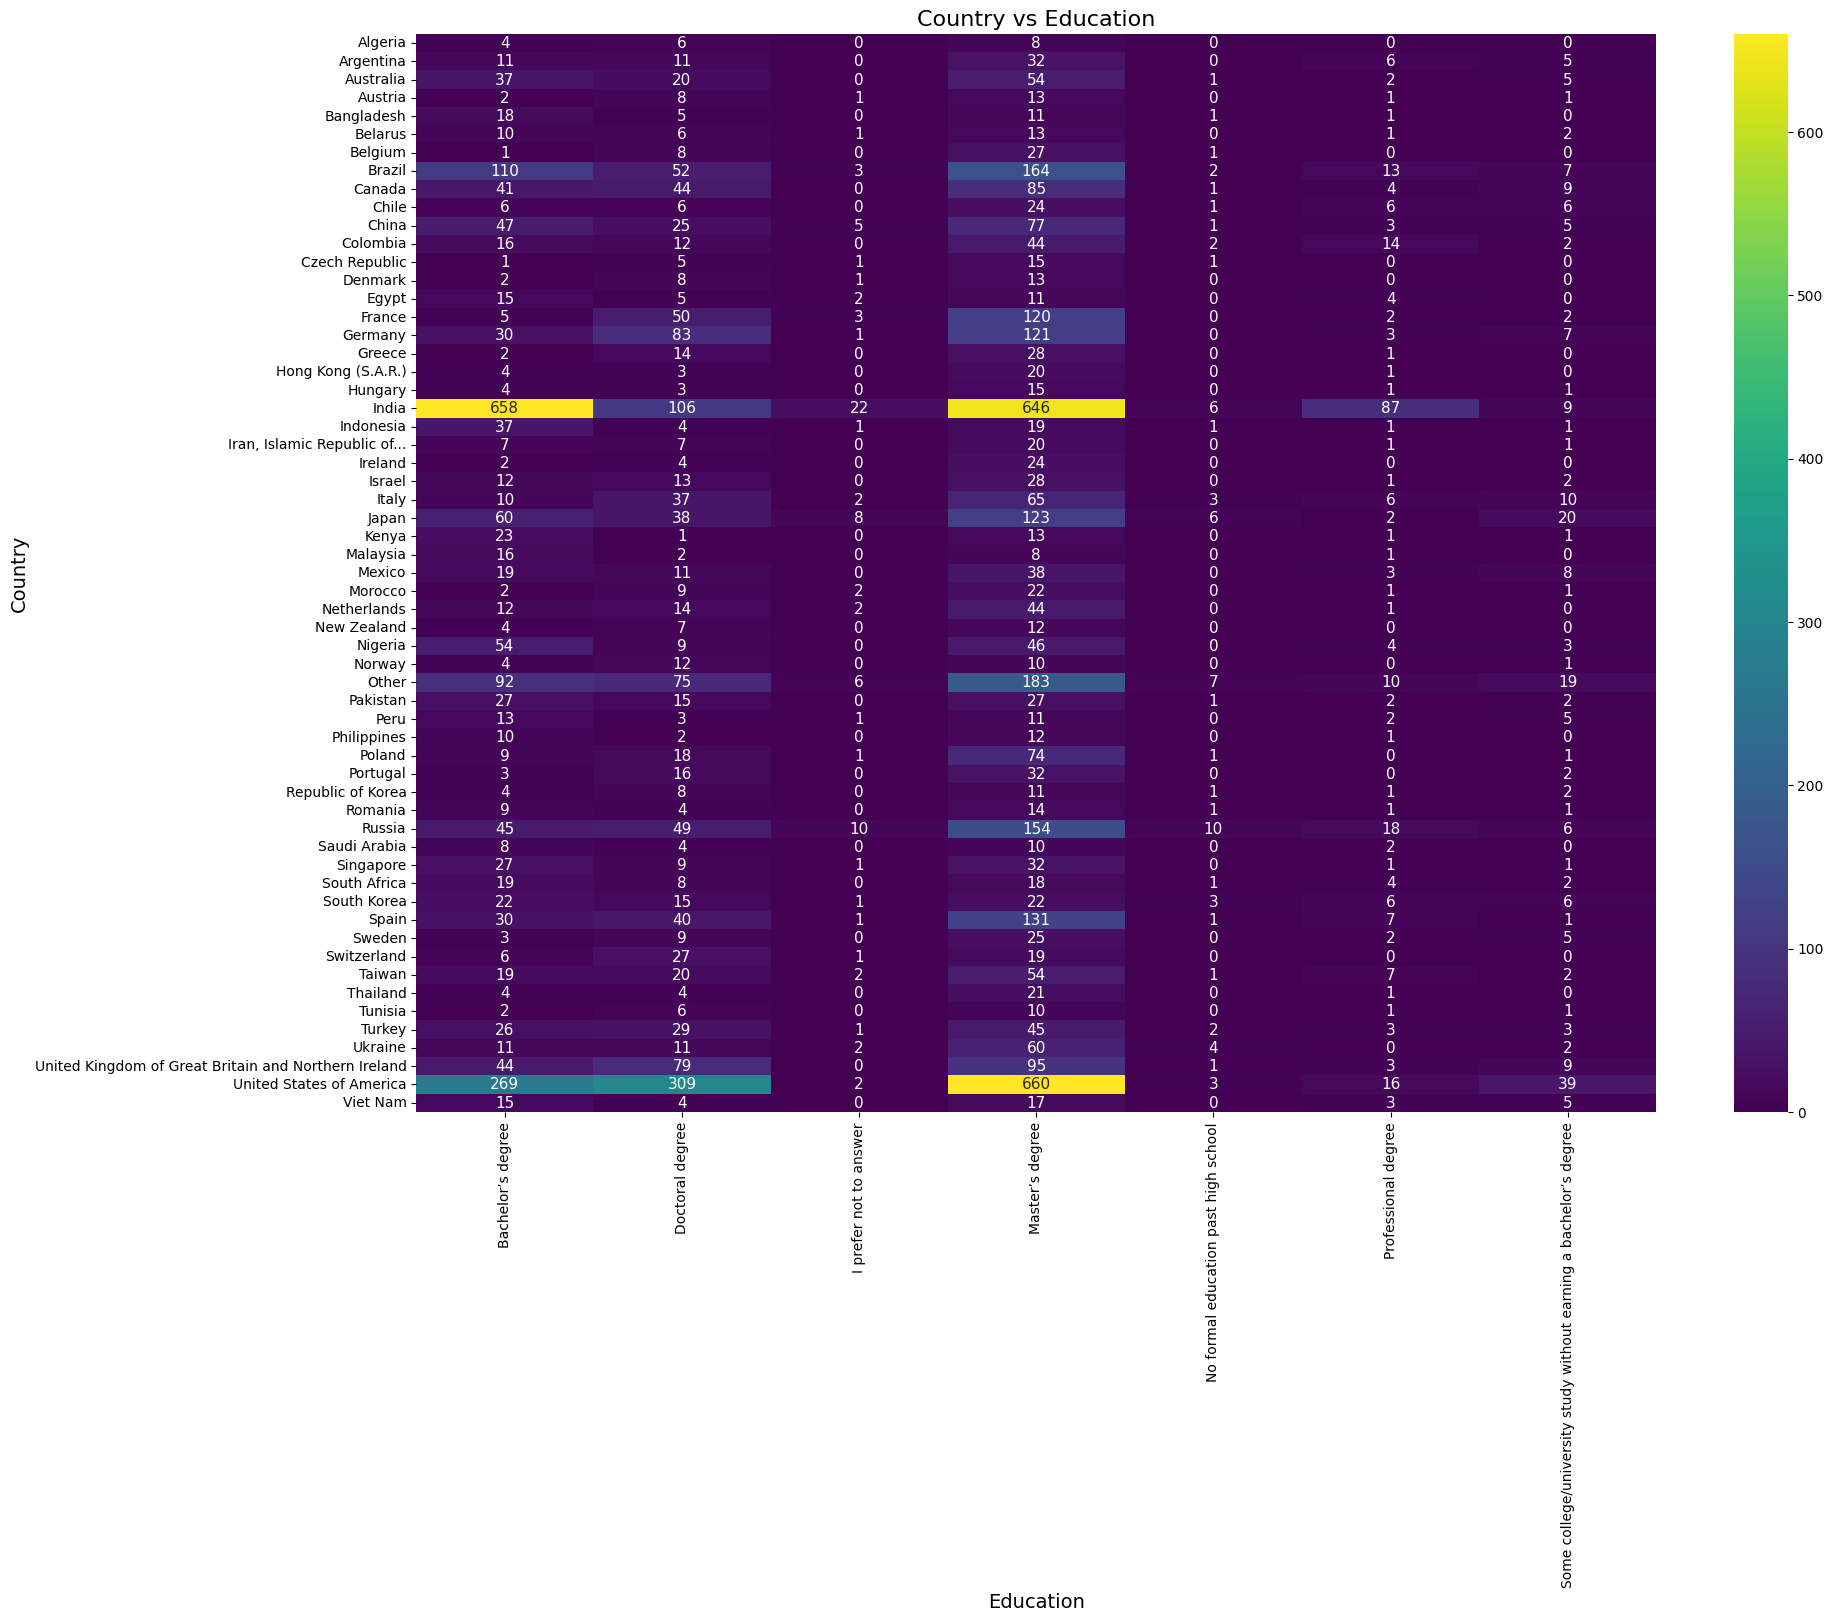

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

# Create a crosstab for Country vs Education
crosstab = pd.crosstab(df['In which country do you currently reside?'], df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'])

# Plot heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='viridis', cbar=True, annot_kws={"size": 11})
plt.title('Country vs Education', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

### Categorical vs Continuous (Salary by Gender)

In [50]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

# Calculate summary statistics for Salary by Gender
summary_stats = df.groupby('What is your gender?')['What is your current yearly compensation (approximate $USD)?'].describe()
print(summary_stats)

                     count unique     top freq
What is your gender?                          
Female                1020     24  $0-999  155
Male                  6779     25  $0-999  662


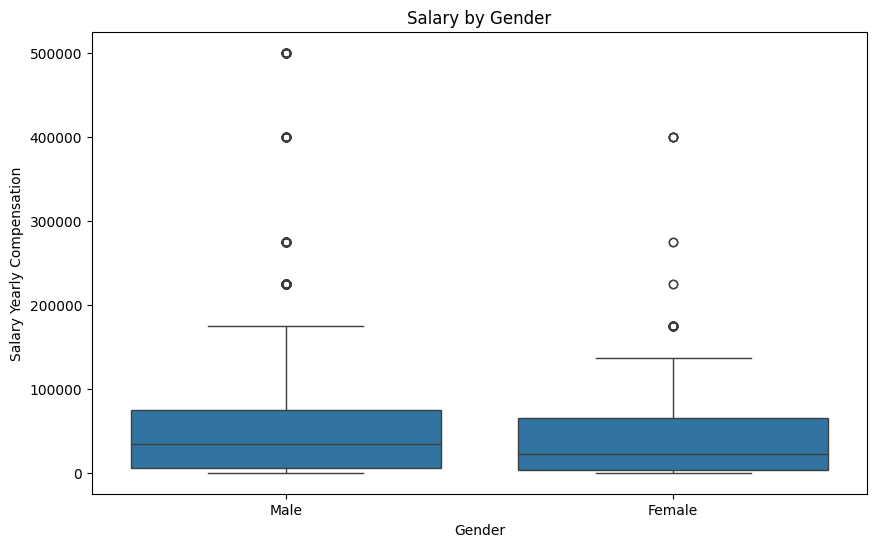

In [51]:
# Data Preparation: Convert salary ranges to numeric midpoints (if applicable)
def convert_salary_range(salary_str):
    try:
        # Remove unwanted characters and split the range
        salary_str = salary_str.replace('$', '').replace('>', '').replace(',', '')
        if '-' in salary_str:
            low, high = salary_str.split('-')
            return (float(low) + float(high)) / 2
        else:
            return float(salary_str)
    except ValueError:
        return None

df['Salary_Numeric'] = df['What is your current yearly compensation (approximate $USD)?'].apply(convert_salary_range)

# Plotting the Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='What is your gender?', y='Salary_Numeric', data=df)
plt.title('Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary Yearly Compensation')
plt.show()


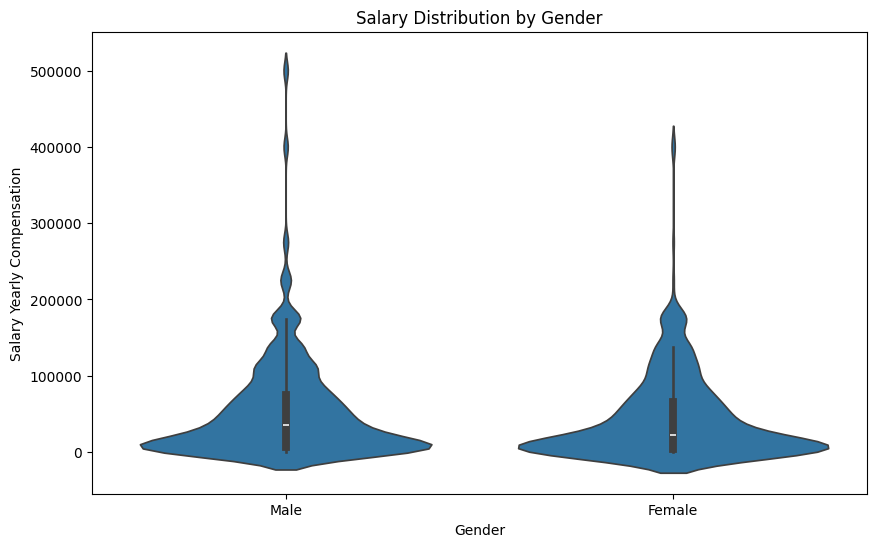

In [52]:
# Plotting the Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='What is your gender?', y='Salary_Numeric', data=df)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary Yearly Compensation')
plt.show()

In [53]:
from scipy.stats import ttest_ind

# Extract salaries for each gender
female_salaries = df[df['What is your gender?'] == 'Female']['Salary_Numeric'].dropna()
male_salaries = df[df['What is your gender?'] == 'Male']['Salary_Numeric'].dropna()

# Perform T-Test
t_stat, p_value = ttest_ind(female_salaries, male_salaries)
print(f'T-Test: t_stat={t_stat}, p-value={p_value}')


T-Test: t_stat=-4.7018964071885065, p-value=2.621845044843746e-06


### Categorical vs Continuous (Education level vs Salary)

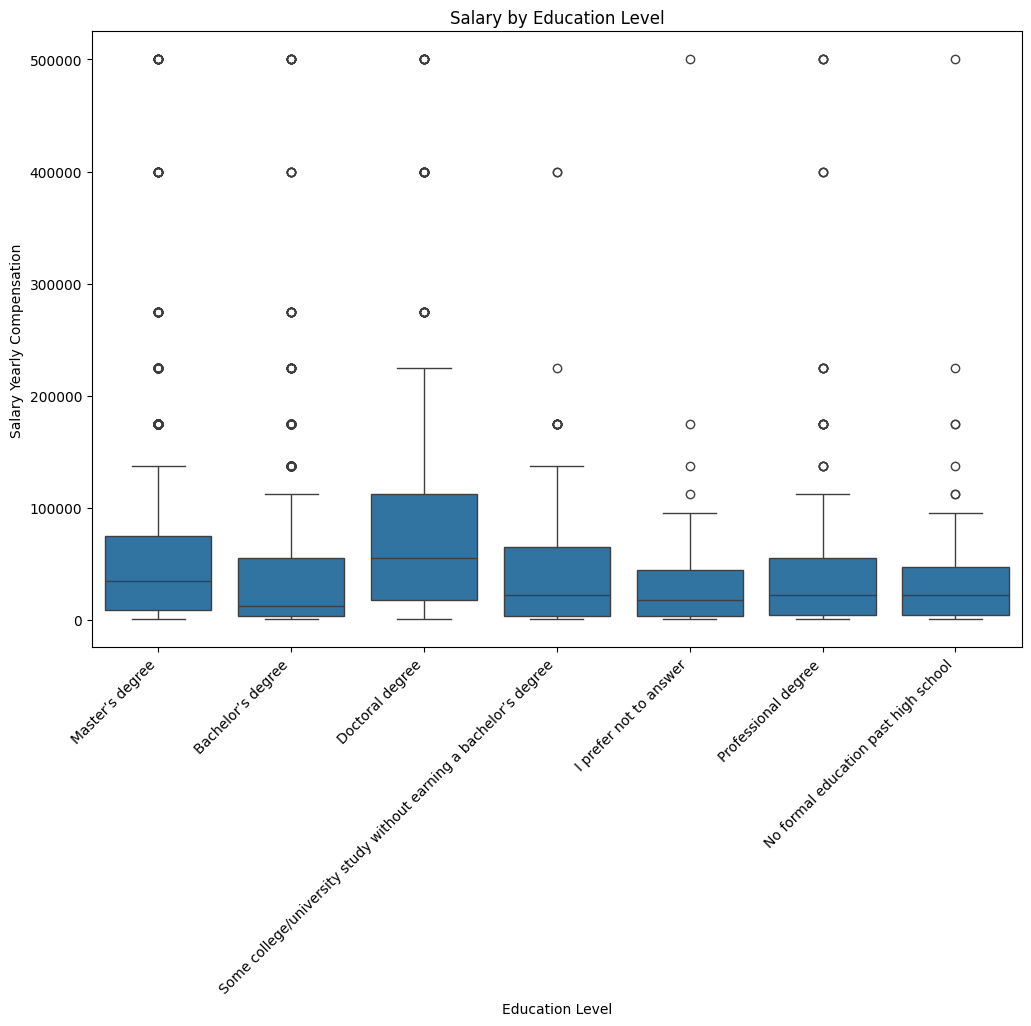

In [56]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

# Simplify column names
df = df.rename(columns={
    'What is your current yearly compensation (approximate $USD)?': 'Salary',
    'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Education_Level'
})

# Data Preparation: Convert salary ranges to numeric midpoints (if applicable)
def convert_salary_range(salary_str):
    try:
        # Remove unwanted characters and split the range
        salary_str = salary_str.replace('$', '').replace('>', '').replace(',', '')
        if '-' in salary_str:
            low, high = salary_str.split('-')
            return (float(low) + float(high)) / 2
        else:
            return float(salary_str)
    except ValueError:
        return None

df['Salary_Numeric'] = df['Salary'].apply(convert_salary_range)

# Step 2: Visualization
plt.figure(figsize=(12, 8))
sns.boxplot(x='Education_Level', y='Salary_Numeric', data=df)
plt.title('Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary Yearly Compensation')
plt.xticks(rotation=45, ha='right')
plt.show()


In [57]:
# Step 3: Statistical Analysis (ANOVA)
anova_model = ols('Salary_Numeric ~ C(Education_Level)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                          sum_sq      df          F        PR(>F)
C(Education_Level)  8.601621e+11     6.0  32.828759  2.709026e-39
Residual            3.402699e+13  7792.0        NaN           NaN


### Categorical vs Continuous (Job Title vs Salary)

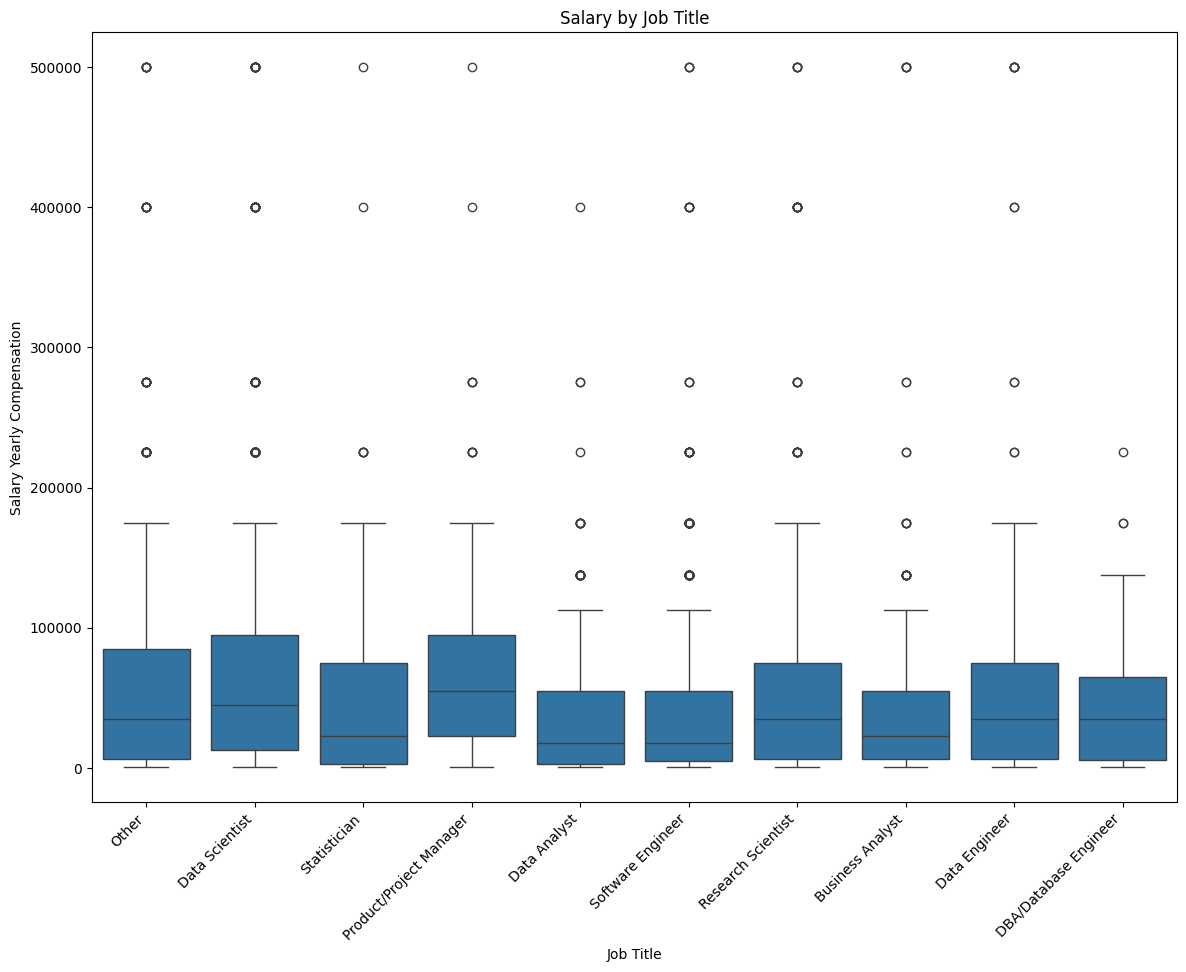

In [58]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

# Simplify column names
df = df.rename(columns={
    'What is your current yearly compensation (approximate $USD)?': 'Salary',
    'Select the title most similar to your current role (or most recent title if retired)': 'Job_Title'
})

# Data Preparation: Convert salary ranges to numeric midpoints (if applicable)
def convert_salary_range(salary_str):
    try:
        # Remove unwanted characters and split the range
        salary_str = salary_str.replace('$', '').replace('>', '').replace(',', '')
        if '-' in salary_str:
            low, high = salary_str.split('-')
            return (float(low) + float(high)) / 2
        else:
            return float(salary_str)
    except ValueError:
        return None

df['Salary_Numeric'] = df['Salary'].apply(convert_salary_range)

# Step 2: Visualization
plt.figure(figsize=(14, 10))
sns.boxplot(x='Job_Title', y='Salary_Numeric', data=df)
plt.title('Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary Yearly Compensation')
plt.xticks(rotation=45, ha='right')
plt.show()


In [59]:
# Step 3: Statistical Analysis (ANOVA)
anova_model = ols('Salary_Numeric ~ C(Job_Title)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                    sum_sq      df         F        PR(>F)
C(Job_Title)  8.614020e+11     9.0  21.90975  4.031683e-37
Residual      3.402575e+13  7789.0       NaN           NaN


### Categorical vs Continuous (Company Size vs Salary)

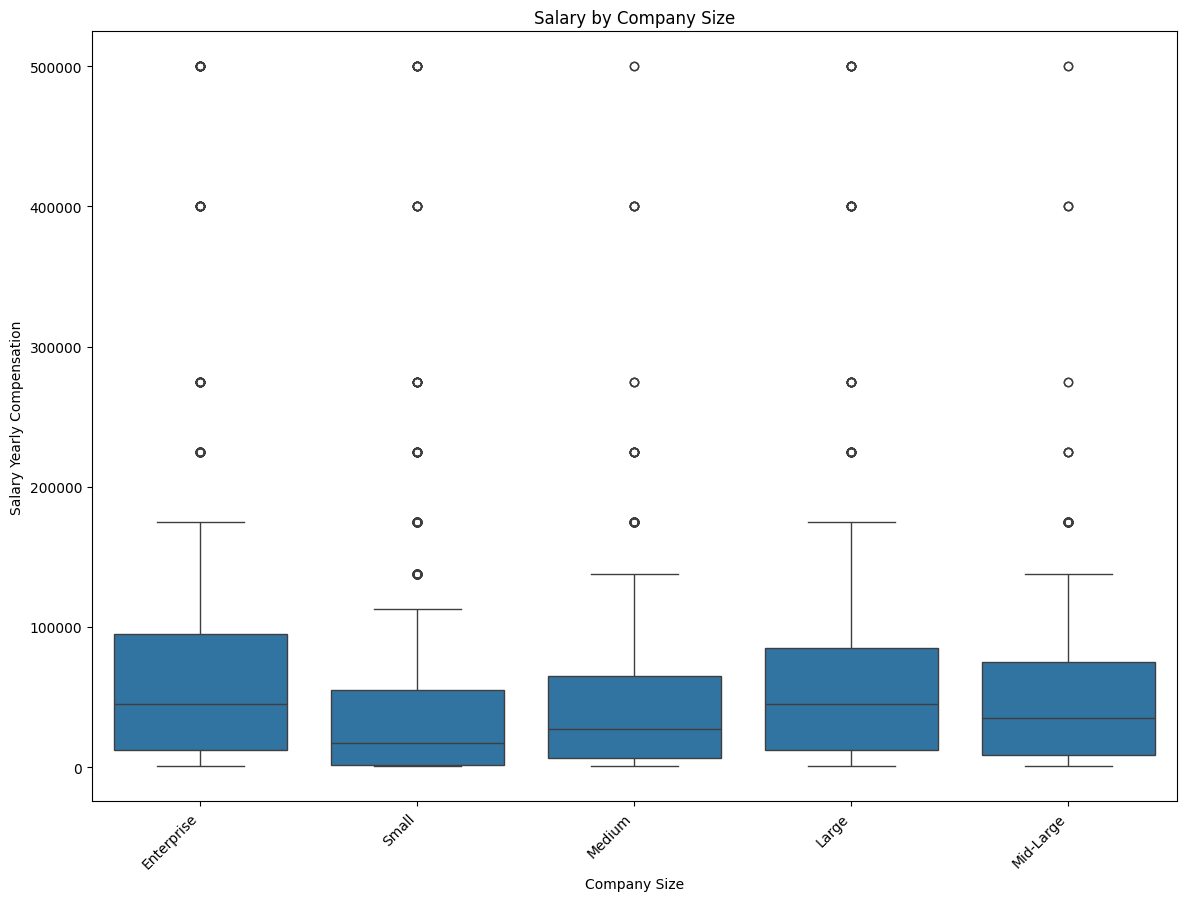

In [60]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

# Simplify column names
df = df.rename(columns={
    'What is your current yearly compensation (approximate $USD)?': 'Salary',
    'What is the size of the company where you are employed?': 'Company_Size'
})

# Data Preparation: Convert salary ranges to numeric midpoints (if applicable)
def convert_salary_range(salary_str):
    try:
        # Remove unwanted characters and split the range
        salary_str = salary_str.replace('$', '').replace('>', '').replace(',', '')
        if '-' in salary_str:
            low, high = salary_str.split('-')
            return (float(low) + float(high)) / 2
        else:
            return float(salary_str)
    except ValueError:
        return None

df['Salary_Numeric'] = df['Salary'].apply(convert_salary_range)

# Step 2: Visualization
plt.figure(figsize=(14, 10))
sns.boxplot(x='Company_Size', y='Salary_Numeric', data=df)
plt.title('Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary Yearly Compensation')
plt.xticks(rotation=45, ha='right')
plt.show()

In [61]:
# Step 3: Statistical Analysis (ANOVA)
anova_model = ols('Salary_Numeric ~ C(Company_Size)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                       sum_sq      df          F        PR(>F)
C(Company_Size)  1.027779e+12     4.0  59.145411  2.850687e-49
Residual         3.385937e+13  7794.0        NaN           NaN


## Multivariate Analysis

### Categorical & Categorical & Continuous Analysis: Education Level, Job Title, and Salary

Understand how different education levels and job titles affect salary.

c:\Users\Muqri Qawiem\Downloads\data-mining-warehousing-wages-analysis\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



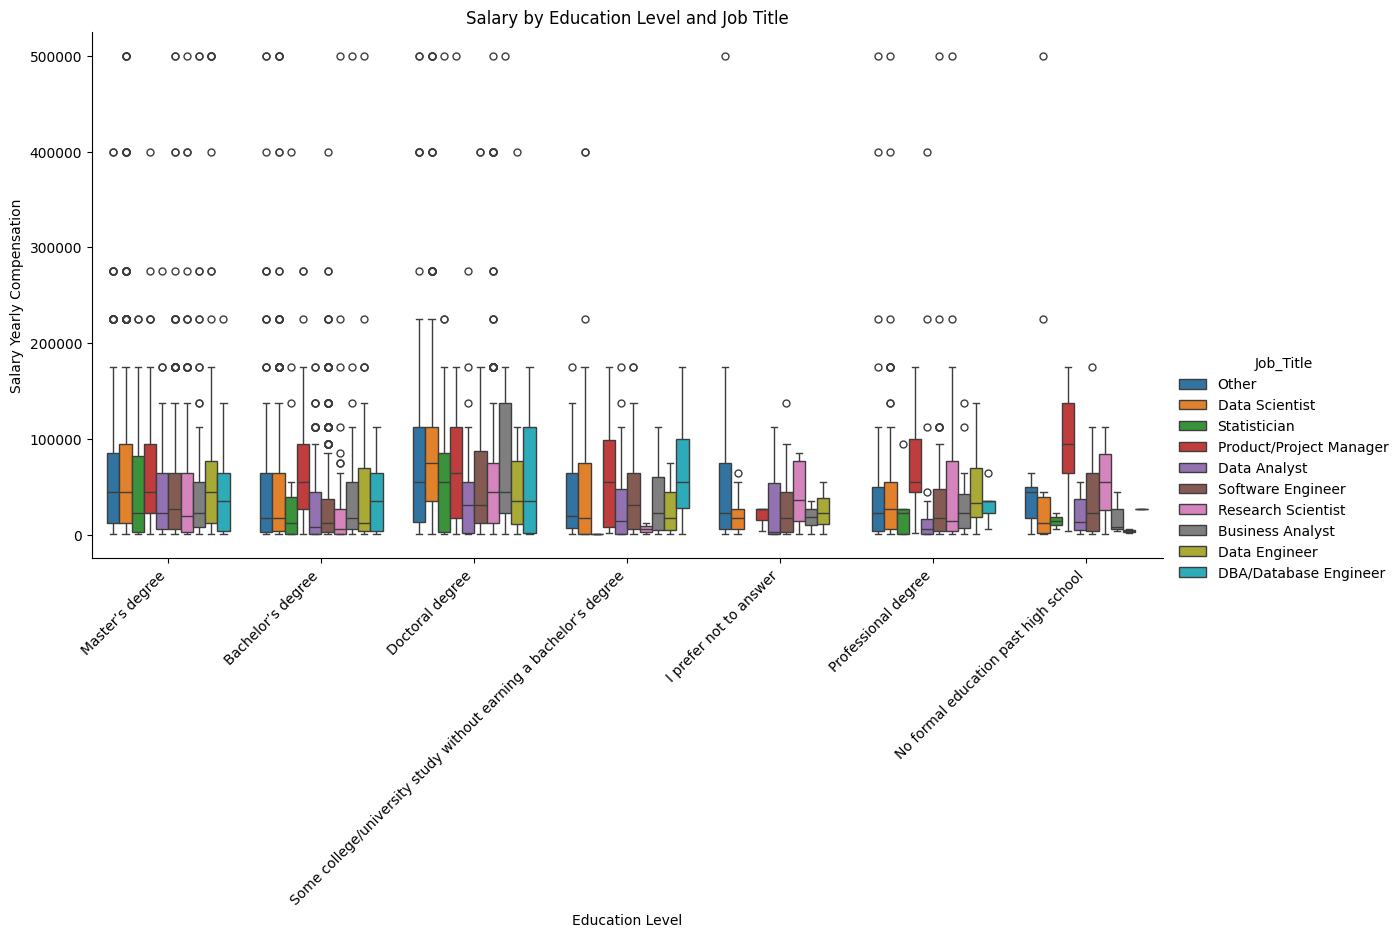

In [69]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

# Simplify column names
df = df.rename(columns={
    'What is your current yearly compensation (approximate $USD)?': 'Salary',
    'What is the size of the company where you are employed?': 'Company_Size',
    'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Education_Level',
    'Select the title most similar to your current role (or most recent title if retired)': 'Job_Title'
})

# Data Preparation: Convert salary ranges to numeric midpoints (if applicable)
def convert_salary_range(salary_str):
    try:
        # Remove unwanted characters and split the range
        salary_str = salary_str.replace('$', '').replace('>', '').replace(',', '')
        if '-' in salary_str:
            low, high = salary_str.split('-')
            return (float(low) + float(high)) / 2
        else:
            return float(salary_str)
    except ValueError:
        return None

df['Salary_Numeric'] = df['Salary'].apply(convert_salary_range)

# Faceted Box Plot
sns.catplot(x='Education_Level', y='Salary_Numeric', hue='Job_Title', data=df, kind='box', height=6, aspect=2)
plt.title('Salary by Education Level and Job Title')
plt.xlabel('Education Level')
plt.ylabel('Salary Yearly Compensation')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#ANOVA Test
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_model = ols('Salary_Numeric ~ C(Education_Level) + C(Job_Title) + C(Education_Level):C(Job_Title)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                                       sum_sq      df          F        PR(>F)
C(Education_Level)               8.151238e+11     6.0  31.763643  2.738295e-26
C(Job_Title)                     9.554755e+11     9.0  24.821903  1.005212e-33
C(Education_Level):C(Job_Title)  2.248895e+11    54.0   0.973718  5.278370e-01
Residual                         3.306570e+13  7731.0        NaN           NaN


c:\Users\Muqri Qawiem\Downloads\data-mining-warehousing-wages-analysis\venv\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4

c:\Users\Muqri Qawiem\Downloads\data-mining-warehousing-wages-analysis\venv\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 9, but rank is 7

c:\Users\Muqri Qawiem\Downloads\data-mining-warehousing-wages-analysis\venv\lib\site-packages\statsmodels\base\model.py:1896: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 54, but rank is 52



| Source                                      | Sum of Squares (sum_sq) | Degrees of Freedom (df) | F-Statistic (F) | p-value (PR(>F))        |
|---------------------------------------------|-------------------------|-------------------------|-----------------|------------------------|
| **C(Education_Level)**                      | 8.151238e+11            | 6                       | 31.763643       | 2.738295e-26           |
| **C(Job_Title)**                            | 9.554755e+11            | 9                       | 24.821903       | 1.005212e-33           |
| **C(Education_Level):C(Job_Title)**         | 2.248895e+11            | 54                      | 0.973718        | 5.278370e-01           |
| **Residual**                                | 3.306570e+13            | 7731                    | NaN             | NaN                    |


### Continuous & Continuous & Categorical Analysis: Salary, Experience, and Gender

Analyze how salary and experience vary by gender.

c:\Users\Muqri Qawiem\Downloads\data-mining-warehousing-wages-analysis\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



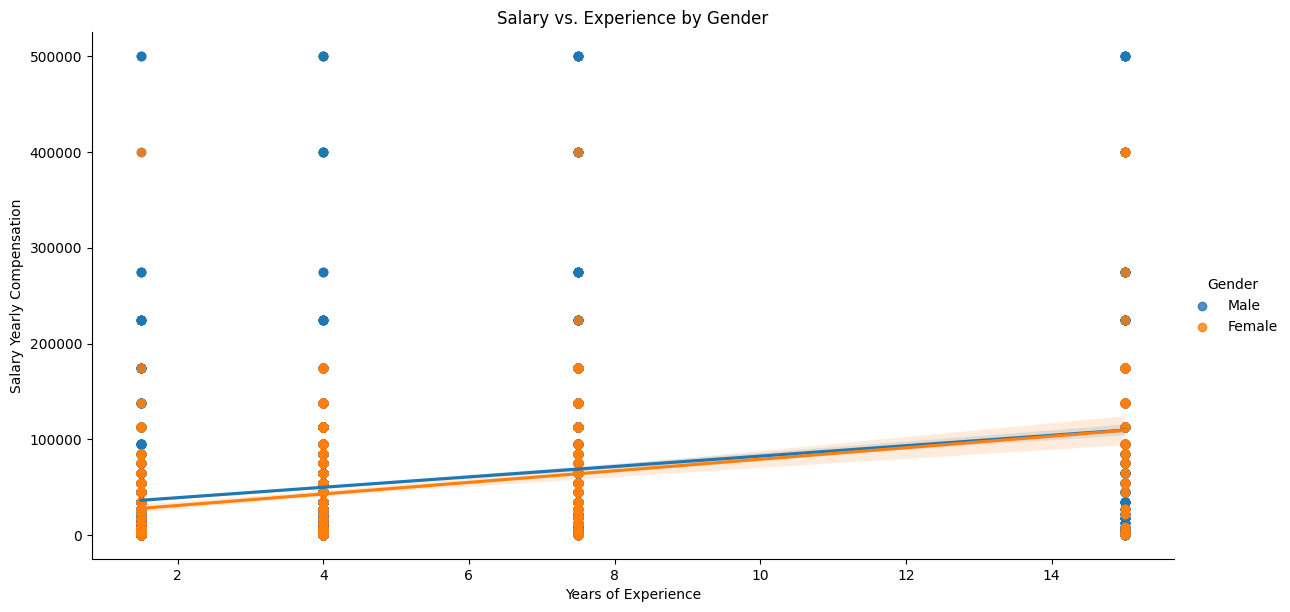

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

# Simplify column names
df = df.rename(columns={
    'What is your current yearly compensation (approximate $USD)?': 'Salary',
    'What is the size of the company where you are employed?': 'Company_Size',
    'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Education_Level',
    'Select the title most similar to your current role (or most recent title if retired)': 'Job_Title',
    'How long have you been writing code to analyze data (at work or at school)?': 'Coding_Experience',
    'What is your gender?': 'Gender'
})

# Data Preparation: Convert salary ranges to numeric midpoints (if applicable)
def convert_salary_range(salary_str):
    try:
        # Remove unwanted characters and split the range
        salary_str = salary_str.replace('$', '').replace('>', '').replace(',', '')
        if '-' in salary_str:
            low, high = salary_str.split('-')
            return (float(low) + float(high)) / 2
        else:
            return float(salary_str)
    except ValueError:
        return None

df['Salary_Numeric'] = df['Salary'].apply(convert_salary_range)

# Convert experience ranges to numeric midpoints
def convert_experience_range(experience_str):
    try:
        if '-' in experience_str:
            low, high = experience_str.split('-')
            low = low.replace('years', '').strip()
            high = high.replace('years', '').strip()
            return (float(low) + float(high)) / 2
        else:
            return float(experience_str.replace('years', '').strip())
    except ValueError:
        return None

df['Coding_Experience_Numeric'] = df['Coding_Experience'].apply(convert_experience_range)

# Scatter Plot with Regression Lines
sns.lmplot(x='Coding_Experience_Numeric', y='Salary_Numeric', hue='Gender', data=df, height=6, aspect=2)
plt.title('Salary vs. Experience by Gender')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Yearly Compensation')
plt.show()

In [75]:
# Multiple Regression Analysis
regression_model = ols('Salary_Numeric ~ Coding_Experience_Numeric + C(Gender)', data=df).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Salary_Numeric   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     451.7
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          6.01e-184
Time:                        12:08:07   Log-Likelihood:                -77552.
No. Observations:                6242   AIC:                         1.551e+05
Df Residuals:                    6239   BIC:                         1.551e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### Categorical & Continuous & Continuous Analysis: Company Size, Job Title, and Salary

Explore how job titles and salaries vary across different company sizes.

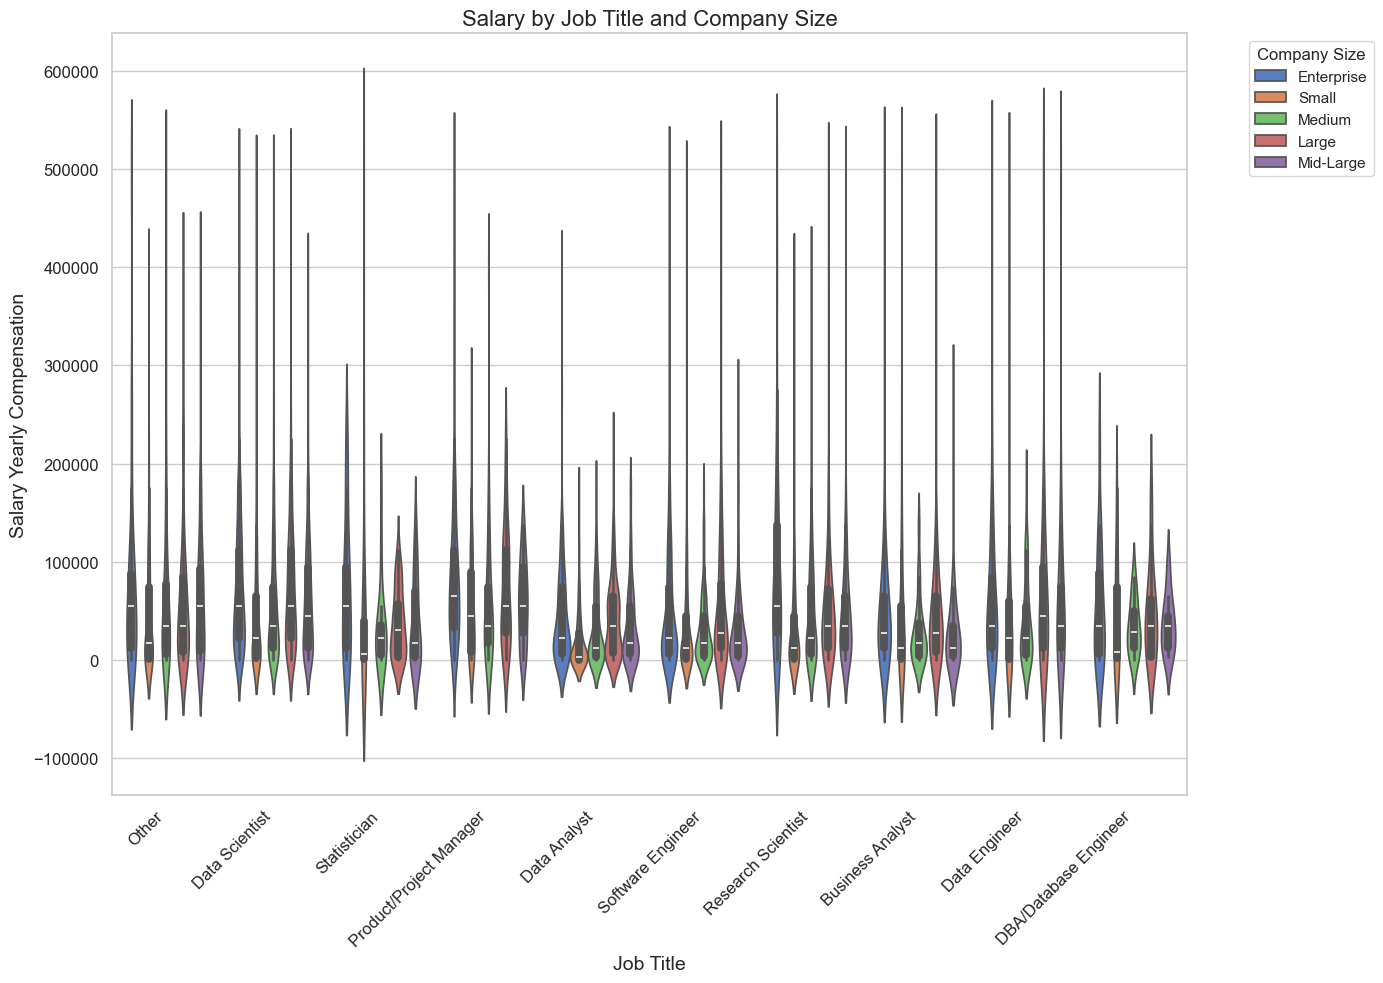

In [80]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

# Simplify column names
df = df.rename(columns={
    'What is your current yearly compensation (approximate $USD)?': 'Salary',
    'What is the size of the company where you are employed?': 'Company_Size',
    'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Education_Level',
    'Select the title most similar to your current role (or most recent title if retired)': 'Job_Title',
    'How long have you been writing code to analyze data (at work or at school)?': 'Coding_Experience',
    'What is your gender?': 'Gender'
})

# Data Preparation: Convert salary ranges to numeric midpoints (if applicable)
def convert_salary_range(salary_str):
    try:
        # Remove unwanted characters and split the range
        salary_str = salary_str.replace('$', '').replace('>', '').replace(',', '')
        if '-' in salary_str:
            low, high = salary_str.split('-')
            return (float(low) + float(high)) / 2
        else:
            return float(salary_str)
    except ValueError:
        return None

df['Salary_Numeric'] = df['Salary'].apply(convert_salary_range)

# Convert experience ranges to numeric midpoints
def convert_experience_range(experience_str):
    try:
        if '-' in experience_str:
            low, high = experience_str.split('-')
            low = low.replace('years', '').strip()
            high = high.replace('years', '').strip()
            return (float(low) + float(high)) / 2
        else:
            return float(experience_str.replace('years', '').strip())
    except ValueError:
        return None

df['Coding_Experience_Numeric'] = df['Coding_Experience'].apply(convert_experience_range)

# Faceted Violin Plot
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")
ax = sns.violinplot(x='Job_Title', y='Salary_Numeric', hue='Company_Size', data=df, palette="muted")
plt.title('Salary by Job Title and Company Size', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Salary Yearly Compensation', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [83]:
import statsmodels.formula.api as smf

#Mixed Linear Model Regression Test
mixed_model = smf.mixedlm('Salary_Numeric ~ C(Job_Title) + C(Company_Size)', data=df, groups=df['Company_Size']).fit()
print(mixed_model.summary())

                                   Mixed Linear Model Regression Results
Model:                            MixedLM                Dependent Variable:                Salary_Numeric 
No. Observations:                 7799                   Method:                            REML           
No. Groups:                       5                      Scale:                             4238862014.9971
Min. group size:                  990                    Log-Likelihood:                    -97378.3511    
Max. group size:                  2226                   Converged:                         Yes            
Mean group size:                  1559.8                                                                   
-----------------------------------------------------------------------------------------------------------
                                            Coef.          Std.Err.       z    P>|z|    [0.025     0.975]  
---------------------------------------------------------------

### 3D Analysis of Salary by Years of Coding Experience and Education Level

In [89]:
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv('../../data/prep_survey_profile.csv')

# Simplify column names
df = df.rename(columns={
    'What is your current yearly compensation (approximate $USD)?': 'Salary',
    'How long have you been writing code to analyze data (at work or at school)?': 'Coding_Experience',
    'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Education_Level'
})

# Data Preparation: Convert salary ranges to numeric midpoints (if applicable)
def convert_salary_range(salary_str):
    try:
        # Remove unwanted characters and split the range
        salary_str = salary_str.replace('$', '').replace('>', '').replace(',', '')
        if '-' in salary_str:
            low, high = salary_str.split('-')
            return (float(low) + float(high)) / 2
        else:
            return float(salary_str)
    except ValueError:
        return None

df['Salary_Numeric'] = df['Salary'].apply(convert_salary_range)

# Convert experience ranges to numeric midpoints
def convert_experience_range(experience_str):
    try:
        if '-' in experience_str:
            low, high = experience_str.split('-')
            low = low.replace('years', '').strip()
            high = high.replace('years', '').strip()
            return (float(low) + float(high)) / 2
        else:
            return float(experience_str.replace('years', '').strip())
    except ValueError:
        return None

df['Coding_Experience_Numeric'] = df['Coding_Experience'].apply(convert_experience_range)

# Create a mapping for Education Level to numeric values
education_mapping = {
    'Less than a Bachelor’s degree': 1,
    'Bachelor’s degree': 2,
    'Master’s degree': 3,
    'Doctoral degree': 4,
    'I prefer not to answer': 0
}

df['Education_Level_Numeric'] = df['Education_Level'].map(education_mapping)

# Plotly 3D Scatter Plot
fig = px.scatter_3d(df, x='Coding_Experience_Numeric', y='Salary_Numeric', z='Education_Level_Numeric',
                    color='Education_Level_Numeric', labels={
                        'Coding_Experience_Numeric': 'Years of Coding Experience',
                        'Salary_Numeric': 'Salary',
                        'Education_Level_Numeric': 'Education Level'
                    }, title='3D Scatter Plot of Salary, Coding Experience, and Education Level',
                    width=1200, height=800)

# Show the plot
fig.show()